In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [30]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [31]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [33]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

robertsport lr
punta arenas cl
hermanus za
tuktoyaktuk ca
point pleasant us
mount gambier au
gwadar pk
punta arenas cl
attawapiskat ca
belmonte br
mataura pf
vao nc
isangel vu
havoysund no
provideniya ru
pisco pe
georgetown us
surt ly
vaini to
arraial do cabo br
cochrane ca
kruisfontein za
qaanaaq gl
broken hill au
avarua ck
berlevag no
albany au
san cristobal ec
ushuaia ar
ushuaia ar
ushuaia ar
mar del plata ar
kalevala ru
carnarvon au
mataura pf
camacha pt
orlik ru
martinesti ro
ushuaia ar
busselton au
east london za
port alfred za
tsihombe mg
richards bay za
saint anthony ca
lebyazhye ru
hobart au
ushuaia ar
chokurdakh ru
nha trang vn
dikson ru
victoria sc
yulara au
saskylakh ru
albany au
souillac mu
westport ie
mataura pf
new norfolk au
srivardhan in
bluff nz
mount gambier au
bluff nz
tumannyy ru
brigantine us
mataura pf
ushuaia ar
brighton us
hasaki jp
hobart au
kazalinsk kz
bandarbeyla so
pietarsaari fi
alirajpur in
namibe ao
hermanus za
rikitea pf
tepatitlan mx
rikitea pf
vila v

cape town za
cape town za
dharchula in
kestel tr
saint-philippe re
amderma ru
hithadhoo mv
ushuaia ar
illoqqortoormiut gl
hobart au
grand river south east mu
mys shmidta ru
amberley nz
tonantins br
chuy uy
college us
kijang id
olbernhau de
taolanaro mg
sampit id
nanortalik gl
vaitupu wf
hobart au
saskylakh ru
tabou ci
ushuaia ar
mataura pf
hambantota lk
tasiilaq gl
puerto ayora ec
rikitea pf
sao joao da barra br
hobart au
east london za
constitucion mx
rivadavia ar
saint george bm
saint-philippe re
clyde river ca
port hedland au
lagoa pt
hede cn
rikitea pf
monrovia lr
busselton au
belaya gora ru
ostersund se
snezhnogorsk ru
busselton au
kapaa us
hokitika nz
hobart au
albany au
sola vu
bay roberts ca
atuona pf
qaanaaq gl
chuy uy
mar del plata ar
yirol sd
bengkulu id
longyearbyen sj
port alfred za
rikitea pf
punta arenas cl
burica pa
ushuaia ar
saldanha za
butaritari ki
jamestown sh
hobart au
eureka us
aykhal ru
chapais ca
nelson bay au
guerrero negro mx
hilo us
castro cl
wenatchee us
lo

kapaa us
cape town za
castro cl
bud no
rikitea pf
nikolskoye ru
barrow us
puerto ayora ec
georgetown sh
nordlingen de
khatanga ru
provideniya ru
ushuaia ar
saskylakh ru
ushuaia ar
kununurra au
atuona pf
cabo san lucas mx
cabo san lucas mx
sebinkarahisar tr
vaini to
karratha au
asau tv
sentyabrskiy ru
xapuri br
port elizabeth za
victoria sc
rikitea pf
coquimbo cl
la ronge ca
codrington ag
rikitea pf
deep river ca
albany au
castro cl
luang prabang la
dikson ru
nizhneyansk ru
rikitea pf
ponta do sol cv
rikitea pf
puerto ayora ec
barentsburg sj
te anau nz
atuona pf
mana gf
luoyang cn
olafsvik is
antofagasta cl
cape town za
bluff nz
sao joao da barra br
rikitea pf
okha ru
rikitea pf
barrow us
punta arenas cl
sitka us
san juan de los morros ve
ushuaia ar
amberley nz
nebug ru
touros br
jiblah ye
sibu my
kapaa us
belushya guba ru
sapouy bf
lompoc us
san borja bo
tarudant ma
sistranda no
aktau kz
ilulissat gl
mataura pf
georgetown sh
east london za
poum nc
bredasdorp za
belushya guba ru
te anau

In [34]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7241cf62e84755c526cdfc174edf4b1a


In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | robertsport
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | point pleasant
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | gwadar
Processing Record 8 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 1 | belmonte
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | havoysund
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | surt
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | cochrane
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | qaana

Processing Record 35 of Set 4 | cap malheureux
Processing Record 36 of Set 4 | jinxiang
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | makakilo city
Processing Record 39 of Set 4 | maun
Processing Record 40 of Set 4 | goure
Processing Record 41 of Set 4 | sao raimundo nonato
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | bloomington
Processing Record 44 of Set 4 | kloulklubed
Processing Record 45 of Set 4 | jumla
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | mongu
Processing Record 49 of Set 4 | san rafael del sur
Processing Record 50 of Set 4 | chenghai
Processing Record 1 of Set 5 | taltal
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | majene
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | zyryanka
Processing Record 6 of Set 5 | brae
Processing Record 7 of Set 5 | srednekolymsk
Processing Record 8 of Set 5 | no

Processing Record 27 of Set 8 | nelson bay
Processing Record 28 of Set 8 | wenatchee
Processing Record 29 of Set 8 | roma
Processing Record 30 of Set 8 | thompson
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | garowe
Processing Record 33 of Set 8 | upata
Processing Record 34 of Set 8 | wajir
Processing Record 35 of Set 8 | rocha
Processing Record 36 of Set 8 | drexel heights
Processing Record 37 of Set 8 | kyra
Processing Record 38 of Set 8 | gudari
Processing Record 39 of Set 8 | banyo
Processing Record 40 of Set 8 | olinda
Processing Record 41 of Set 8 | kathmandu
Processing Record 42 of Set 8 | comodoro rivadavia
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | lichuan
Processing Record 45 of Set 8 | rudsar
Processing Record 46 of Set 8 | bednodemyanovsk
City not found. Skipping...
Processing Record 47 of Set 8 | eugene
Processing Record 48 of Set 8 | beyneu
Processing Record 49 of Set 8 | port hawkesbury
Processing Record 50 of 

Processing Record 16 of Set 12 | jesus maria
Processing Record 17 of Set 12 | aflu
City not found. Skipping...
Processing Record 18 of Set 12 | fasa
Processing Record 19 of Set 12 | sao jose da coroa grande
Processing Record 20 of Set 12 | ljaskovec
City not found. Skipping...
Processing Record 21 of Set 12 | balkhash
Processing Record 22 of Set 12 | registro
Processing Record 23 of Set 12 | marcona
City not found. Skipping...
Processing Record 24 of Set 12 | cowra
Processing Record 25 of Set 12 | tsiroanomandidy
Processing Record 26 of Set 12 | ambulu
Processing Record 27 of Set 12 | bud
Processing Record 28 of Set 12 | nordlingen
City not found. Skipping...
Processing Record 29 of Set 12 | sebinkarahisar
Processing Record 30 of Set 12 | xapuri
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | deep river
Processing Record 33 of Set 12 | luang prabang
Processing Record 34 of Set 12 | te anau
Processing Record 35 of Set 12 | mana
Processing Record 36 of Set 12 |

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Robertsport,6.75,-11.37,78.13,80,100,6.17,LR,2020-06-21 05:40:27
1,Punta Arenas,-53.15,-70.92,33.80,87,99,9.17,CL,2020-06-21 05:40:27
2,Hermanus,-34.42,19.23,57.00,93,10,7.00,ZA,2020-06-21 05:40:27
3,Tuktoyaktuk,69.45,-133.04,37.40,100,90,9.17,CA,2020-06-21 05:40:28
4,Point Pleasant,40.08,-74.07,70.00,88,1,4.70,US,2020-06-21 05:40:28
5,Mount Gambier,-37.83,140.77,55.40,71,90,9.17,AU,2020-06-21 05:40:28
6,Gwadar,25.12,62.33,87.94,67,37,8.66,PK,2020-06-21 05:40:28
7,Belmonte,-15.86,-38.88,66.20,93,20,3.36,BR,2020-06-21 05:40:29
8,Mataura,-46.19,168.86,39.00,83,1,3.00,NZ,2020-06-21 05:40:29
9,Vao,-22.67,167.48,69.08,63,4,12.03,NC,2020-06-21 05:40:29


In [38]:
#Inserting new column order
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [39]:
#Inputting new column order to data frame 
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Robertsport,LR,2020-06-21 05:40:27,6.75,-11.37,78.13,80,100,6.17
1,Punta Arenas,CL,2020-06-21 05:40:27,-53.15,-70.92,33.80,87,99,9.17
2,Hermanus,ZA,2020-06-21 05:40:27,-34.42,19.23,57.00,93,10,7.00
3,Tuktoyaktuk,CA,2020-06-21 05:40:28,69.45,-133.04,37.40,100,90,9.17
4,Point Pleasant,US,2020-06-21 05:40:28,40.08,-74.07,70.00,88,1,4.70
...,...,...,...,...,...,...,...,...,...
564,Naryan-Mar,RU,2020-06-21 05:42:43,67.67,53.09,49.78,59,92,16.93
565,Nangomba,TZ,2020-06-21 05:42:43,-10.90,38.50,70.61,63,1,7.40
566,Gol,NO,2020-06-21 05:42:43,60.70,8.95,59.00,78,78,4.00
567,Ukiah,US,2020-06-21 05:42:33,39.15,-123.21,73.40,49,1,4.70


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [42]:
import time

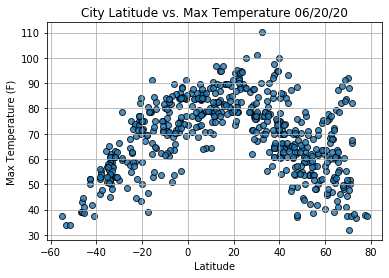

In [43]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

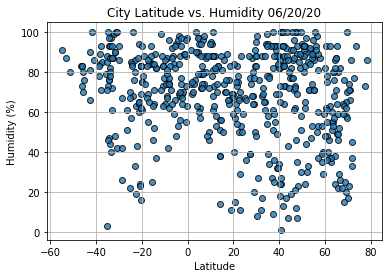

In [44]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

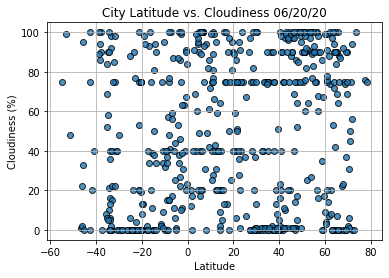

In [45]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

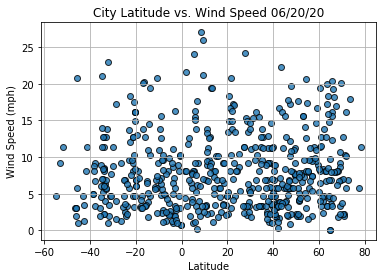

In [46]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [61]:
#Finding the correlation between latitude and maximum temperature
#import dependency
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
#creating a pivot table using loc method to obtain everything at index 13 of the dataframe
index13=city_data_df.loc[13]
index13

City                        Pisco
Country                        PE
Date          2020-06-21 05:35:35
Lat                         -13.7
Lng                        -76.22
Max Temp                     64.4
Humidity                       82
Cloudiness                     90
Wind Speed                    4.7
Name: 13, dtype: object

In [63]:
#creating a new data frame to gather data that meets criteria for northern hemisphere
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Robertsport,LR,2020-06-21 05:40:27,6.75,-11.37,78.13,80,100,6.17
3,Tuktoyaktuk,CA,2020-06-21 05:40:28,69.45,-133.04,37.40,100,90,9.17
4,Point Pleasant,US,2020-06-21 05:40:28,40.08,-74.07,70.00,88,1,4.70
6,Gwadar,PK,2020-06-21 05:40:28,25.12,62.33,87.94,67,37,8.66
11,Havoysund,NO,2020-06-21 05:40:30,71.00,24.66,51.80,71,45,2.24
...,...,...,...,...,...,...,...,...,...
563,Altay,CN,2020-06-21 05:42:35,47.87,88.12,57.42,35,17,10.83
564,Naryan-Mar,RU,2020-06-21 05:42:43,67.67,53.09,49.78,59,92,16.93
566,Gol,NO,2020-06-21 05:42:43,60.70,8.95,59.00,78,78,4.00
567,Ukiah,US,2020-06-21 05:42:33,39.15,-123.21,73.40,49,1,4.70


In [73]:
#creating a new data frame to gather data that meets criteria for southern hemisphere
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Punta Arenas,CL,2020-06-21 05:40:27,-53.15,-70.92,33.80,87,99,9.17
2,Hermanus,ZA,2020-06-21 05:40:27,-34.42,19.23,57.00,93,10,7.00
5,Mount Gambier,AU,2020-06-21 05:40:28,-37.83,140.77,55.40,71,90,9.17
7,Belmonte,BR,2020-06-21 05:40:29,-15.86,-38.88,66.20,93,20,3.36
8,Mataura,NZ,2020-06-21 05:40:29,-46.19,168.86,39.00,83,1,3.00
...,...,...,...,...,...,...,...,...,...
546,Antofagasta,CL,2020-06-21 05:42:38,-23.65,-70.40,57.20,76,90,2.24
553,San Borja,BO,2020-06-21 05:42:40,-14.82,-66.85,72.61,84,50,1.83
561,Sesheke,ZM,2020-06-21 05:42:42,-17.48,24.30,39.20,86,0,3.02
562,Daru,PG,2020-06-21 05:42:42,-9.08,143.21,79.88,81,34,12.64


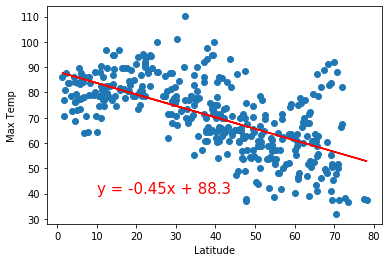

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

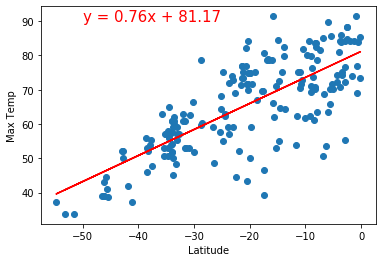

In [75]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

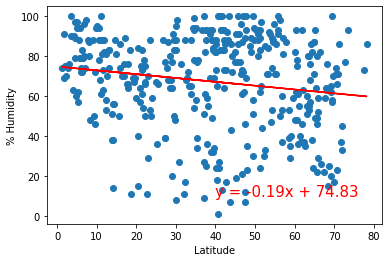

In [76]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

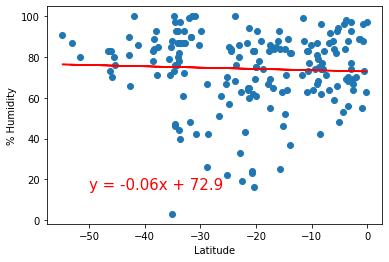

In [77]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

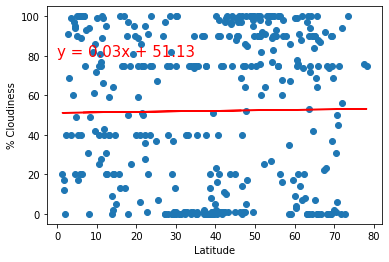

In [78]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,80))

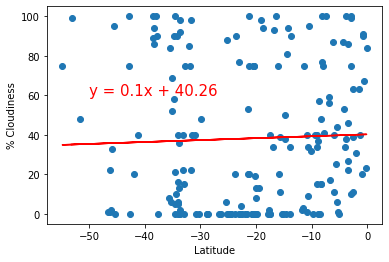

In [79]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

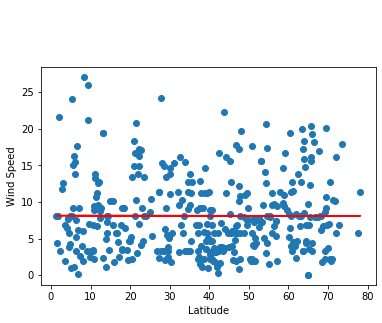

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

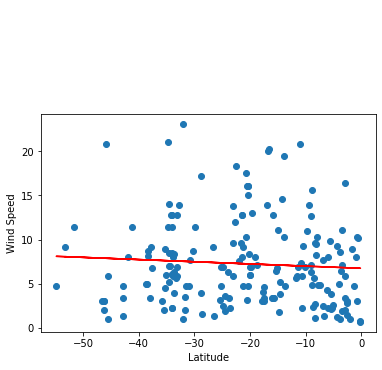

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))